In [1]:
from qcodes.instrument_drivers.Lakeshore.Model_325 import Model_325

In [2]:
lake = Model_325("lake", "GPIB0::12::INSTR")

Connected to: LSCI 325 (serial:LSA2251, firmware:1.8/1.1) in 0.19s


In [3]:
lake.sensor_A.status()

'OK'

In [4]:
lake.sensor_A.temperature()

14.238

In [5]:
lake.sensor_A.temperature.unit

'K'

In [6]:
curve = lake.sensor_A.curvef

In [9]:
lake.sensor[0].curvef

AttributeError: 'Model_325_Sensor' object and its delegates have no attribute 'curvef'

In [7]:
dir(lake.sensor_A)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_sum_terms',
 '_input',
 '_meta_attrs',
 '_parent',
 'add_function',
 'add_parameter',
 'add_submodule',
 'ask',
 'ask_raw',
 'call',
 'compensation',
 'curve_index',
 'curvef',
 'decode_sensor_status',
 'delegate_attr_dicts',
 'delegate_attr_objects',
 'full_name',
 'functions',
 'get',
 'load_metadata',
 'metadata',
 'name',
 'name_parts',
 'omit_delegate_attrs',
 'parameters',
 'parent',
 'print_readable_snapshot',
 'root_instrument',
 'sensor_status_codes',
 'set',
 'short_name',
 'snapshot',
 'snapshot_base',
 'status',
 'submodules',
 'temperature',
 'type',
 'va

In [10]:
lake.sensor_A

<Model_325_Sensor: lake_sensor_A of Model_325: lake>

In [7]:
lake.sensor_A.curve_index()

'23'

In [10]:
from qcodes.instrument_drivers.Lakeshore.Model_325 import Model_325_Sensor

In [11]:
Model_325_Sensor.curvef

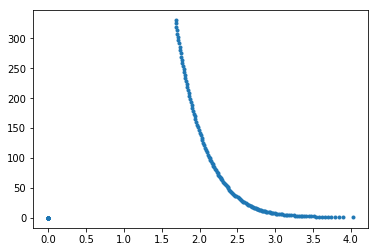

In [51]:
import matplotlib.pyplot as plt

plt.plot(values[::2], values[1::2], '.')
plt.show()

In [52]:
import numpy as np 

v = np.array(values).reshape(-1, 2)

In [53]:
v[:, 1]

array([ 330.152,  325.   ,  319.   ,  313.5  ,  308.   ,  302.5  ,
        297.   ,  291.5  ,  286.   ,  280.5  ,  275.   ,  269.5  ,
        264.   ,  258.5  ,  253.5  ,  248.5  ,  243.5  ,  238.5  ,
        233.5  ,  228.5  ,  223.5  ,  218.5  ,  213.5  ,  208.5  ,
        203.5  ,  198.5  ,  193.5  ,  188.5  ,  183.5  ,  178.5  ,
        174.   ,  169.5  ,  165.   ,  160.5  ,  156.   ,  151.5  ,
        147.   ,  142.5  ,  138.   ,  133.5  ,  129.5  ,  125.5  ,
        121.5  ,  117.5  ,  113.5  ,  109.5  ,  105.5  ,  102.   ,
         99.5  ,   97.   ,   94.5  ,   92.   ,   89.5  ,   87.   ,
         84.5  ,   82.   ,   79.5  ,   77.   ,   74.5  ,   72.5  ,
         70.5  ,   68.5  ,   66.5  ,   64.5  ,   62.5  ,   60.5  ,
         58.6  ,   56.6  ,   54.6  ,   52.8  ,   51.   ,   49.2  ,
         47.4  ,   45.6  ,   43.8  ,   42.2  ,   40.6  ,   39.   ,
         37.4  ,   35.8  ,   34.3  ,   32.8  ,   31.3  ,   29.9  ,
         28.5  ,   27.1  ,   25.8  ,   24.5  ,   23.3  ,   22.

In [47]:
lake.ask("CRVHDR? 23")

'CX-1050-SD-HT-1,X116078   ,4,+325.00,1'

In [46]:
lake.ask("INCRV?")

'23'

In [54]:
10 ** v[:, 0]

array([  4.79291801e+01,   4.85590297e+01,   4.93219229e+01,
         5.00483772e+01,   5.08007355e+01,   5.15822165e+01,
         5.23950187e+01,   5.32390136e+01,   5.41152912e+01,
         5.50287946e+01,   5.59783380e+01,   5.69678724e+01,
         5.79989325e+01,   5.90731324e+01,   6.00924623e+01,
         6.11504983e+01,   6.22529591e+01,   6.34001083e+01,
         6.45966506e+01,   6.58430591e+01,   6.71459774e+01,
         6.85046418e+01,   6.99262116e+01,   7.14118033e+01,
         7.29675896e+01,   7.45984837e+01,   7.63079875e+01,
         7.81034108e+01,   7.99907926e+01,   8.19747310e+01,
         8.38532694e+01,   8.58202944e+01,   8.78860610e+01,
         9.00575235e+01,   9.23400276e+01,   9.47479888e+01,
         9.72836821e+01,   9.99631654e+01,   1.02799263e+02,
         1.05801055e+02,   1.08625053e+02,   1.11604062e+02,
         1.14754573e+02,   1.18091870e+02,   1.21632603e+02,
         1.25394937e+02,   1.29404685e+02,   1.33137378e+02,
         1.35947116e+02,

# Go to a set point

In [7]:
%matplotlib notebook

import time
import numpy
from IPython.display import display
from ipywidgets import interact, widgets
from matplotlib import pyplot as plt

def live_plot_temperature_reading(channel_to_read, read_period=0.2, n_reads=1000):
    """
    Live plot the temperature reading from a Lakeshore sensor channel
    
    Args:
        channel_to_read
            Lakeshore channel object to read the temperature from
        read_period
            time in seconds between two reads of the temperature
        n_reads
            total number of reads to perform
    """

    # Make a widget for a text display that is contantly being updated
    text = widgets.Text()
    display(text)

    fig, ax = plt.subplots(1)
    line, = ax.plot([], [], '*-')
    ax.set_xlabel('Time, s')
    ax.set_ylabel(f'Temperature, {channel_to_read.temperature.unit}')
    fig.show()
    plt.ion()

    for i in range(n_reads):
        time.sleep(read_period)

        # Update the text field
        text.value = f'T = {channel_to_read.temperature()}'

        # Add new point to the data that is being plotted
        line.set_ydata(numpy.append(line.get_ydata(), channel_to_read.temperature()))
        line.set_xdata(numpy.arange(0, len(line.get_ydata()), 1)*read_period)

        ax.relim()  # Recalculate limits
        ax.autoscale_view(True, True, True)  # Autoscale
        fig.canvas.draw()  # Redraw

Text(value='')

<IPython.core.display.Javascript object>


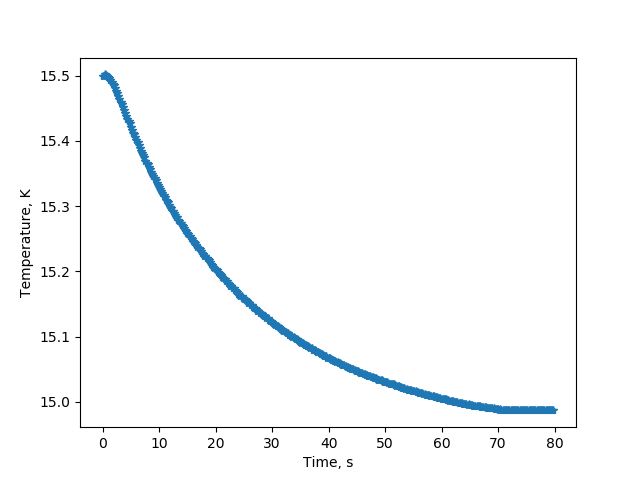

In [9]:
lake.heater_1.control_mode("Manual PID")
lake.heater_1.output_range("Low (2.5W)")
lake.heater_1.input_channel("A")
# The following seem to be good settings for our setup
lake.heater_1.P(400)
lake.heater_1.I(40)
lake.heater_1.D(10)


lake.heater_1.setpoint(15.0)  # <- temperature 
live_plot_temperature_reading(lake.sensor_a, n_reads=400)

In [ ]:
# When doing down -> slope = -2.5 mK/s
# When you are going up: does not matter. 